In [8]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# For reproducibility
np.random.seed(42)
tf.random.set_seed(42)


In [9]:

csv_path = 'mobile_price_classification.csv'
df = pd.read_csv(csv_path)
print('Shape:', df.shape)
df.head()

Shape: (2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1611,0,3,0,3,1,25,1,210,2,...,213,1586,701,8,6,11,1,1,0,0
1,1222,0,1,0,7,1,8,1,135,8,...,282,997,2481,19,18,20,1,0,0,2
2,1876,0,3,0,9,0,14,0,193,7,...,286,983,1283,8,1,8,1,1,0,1
3,1009,1,2,0,4,0,17,0,172,3,...,251,1450,3701,18,7,19,1,1,0,3
4,635,1,0,1,7,0,60,1,132,5,...,1011,1949,1958,15,5,5,1,0,0,1


In [10]:
display(df.info())
display(df.describe())
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   battery_power  2000 non-null   int64
 1   blue           2000 non-null   int64
 2   clock_speed    2000 non-null   int64
 3   dual_sim       2000 non-null   int64
 4   fc             2000 non-null   int64
 5   four_g         2000 non-null   int64
 6   int_memory     2000 non-null   int64
 7   m_dep          2000 non-null   int64
 8   mobile_wt      2000 non-null   int64
 9   n_cores        2000 non-null   int64
 10  pc             2000 non-null   int64
 11  px_height      2000 non-null   int64
 12  px_width       2000 non-null   int64
 13  ram            2000 non-null   int64
 14  sc_h           2000 non-null   int64
 15  sc_w           2000 non-null   int64
 16  talk_time      2000 non-null   int64
 17  three_g        2000 non-null   int64
 18  touch_screen   2000 non-null   int64
 19  wifi  

None

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.019500,0.4950,1.541500,0.509500,4.312000,0.521500,32.083000,0.497500,140.309000,4.520500,...,645.187000,1251.632000,2124.894000,12.299000,5.771500,11.014500,0.761500,0.503000,0.507000,1.500000
std,441.030563,0.5001,0.887509,0.500035,4.352026,0.499662,18.201037,0.500119,35.713937,2.287837,...,444.817425,435.256768,1085.473583,4.231259,4.371023,5.481178,0.426273,0.500116,0.500076,1.118314
min,478.000000,0.0000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.000000,1.000000,...,0.000000,477.000000,257.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,853.000000,0.0000,1.000000,0.000000,1.000000,0.000000,16.000000,0.000000,108.000000,3.000000,...,282.000000,874.000000,1205.000000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1230.500000,0.0000,1.000000,1.000000,3.000000,1.000000,32.000000,0.000000,141.000000,4.000000,...,563.500000,1247.500000,2148.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1621.000000,1.0000,2.000000,1.000000,7.000000,1.000000,48.000000,1.000000,171.000000,7.000000,...,953.000000,1617.000000,3054.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,2083.000000,1.0000,3.000000,1.000000,20.000000,1.000000,67.000000,1.000000,210.000000,8.000000,...,1963.000000,2089.000000,4135.000000,20.000000,19.000000,21.000000,1.000000,1.000000,1.000000,3.000000


,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [11]:
X = df.drop('price_range', axis=1)
y = df['price_range']
print('Features shape:', X.shape)
print('Label shape:', y.shape)

Features shape: (2000, 20)
Label shape: (2000,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print('Train:', X_train.shape, y_train.shape)
print('Test :', X_test.shape, y_test.shape)

Train: (1600, 20) (1600,)
Test : (400, 20) (400,)


In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
X_train_scaled[:2]  # quick peek

array([[-0.37959865, -0.98265048, -0.5961867 , -1.03563452,  0.62504036,
        -1.040833  , -1.27161118,  1.01511421,  1.57947411, -1.09462252,
         0.19155611,  0.51040773,  1.19331602, -0.70564627, -1.48603733,
        -1.09326535,  0.55463121,  0.55713671,  0.97897106, -0.99875078],
       [-1.08652727, -0.98265048,  0.52604709,  0.96559161, -0.96597146,
         0.96076892, -1.54744126, -0.98511083, -1.50598411,  1.51875132,
        -1.27568217, -0.7705893 , -0.036013  , -0.81427557,  1.57643928,
         1.87306901, -1.26756579,  0.55713671,  0.97897106,  1.00125078]])

In [14]:
n_features = X_train_scaled.shape[1]
n_classes = y.nunique()

model = Sequential([
    Dense(32, activation='relu', input_shape=(n_features,)),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])

In [15]:

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,268 (4.95 KB)

 Trainable params: 1,268 (4.95 KB)

 Non-trainable params: 0 (0.00 B)

## 8. Train the model

In [16]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)
print('Epochs run:', len(history.history['loss']))

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2239 - loss: 1.5809 - val_accuracy: 0.2656 - val_loss: 1.4239
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2943 - loss: 1.3901 - val_accuracy: 0.3531 - val_loss: 1.3403
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3949 - loss: 1.3046 - val_accuracy: 0.4000 - val_loss: 1.2693
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4894 - loss: 1.2161 - val_accuracy: 0.4844 - val_loss: 1.1719
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5524 - loss: 1.1015 - val_accuracy: 0.5406 - val_loss: 1.0513
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6006 - loss: 0.9698 - val_accuracy: 0.5938 - val_loss: 0.9209
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6680 - loss: 0.8416 - val_accuracy: 0.6687 - val_loss: 0.8012
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7277 - loss: 0.7289 - val_accuracy: 0.7281 - v

## 9. Plot accuracy and loss

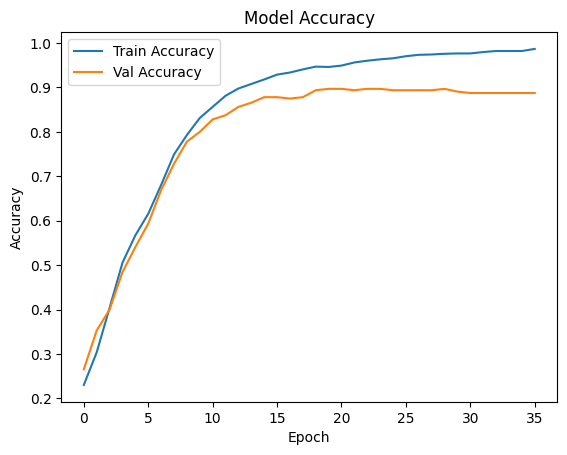

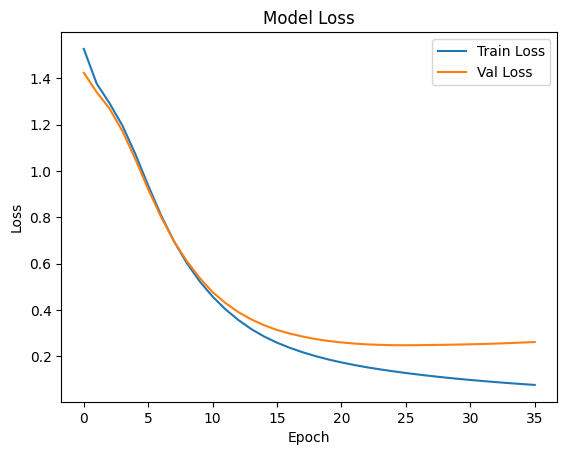

In [17]:
# Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
y_proba = model.predict(X_test_scaled)
y_pred = np.argmax(y_proba, axis=1)
print('Test Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Test Accuracy: 0.8625

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90       100
           1       0.89      0.75      0.82       100
           2       0.83      0.82      0.82       100
           3       0.87      0.93      0.90       100

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400

Confusion Matrix:
 [[95  5  0  0]
 [15 75 10  0]
 [ 0  4 82 14]
 [ 0  0  7 93]]


In [19]:
model.save('beginner_ann_mobile_price.h5')
import joblib
joblib.dump(scaler, 'scaler.pkl')
print('Saved: beginner_ann_mobile_price.h5 and scaler.pkl')

Saved: beginner_ann_mobile_price.h5 and scaler.pkl
